In this task, we try to classify the breast cancer dataset from the UCI Machine Learning respository (http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [1]:
# Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Load dataset
cancer = pd.read_csv("./data/breast_cancer.csv")
cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


Here we count the values of the class labels. 52 rows are labelled with class 1 and 64 rows are labelled with class 2. So it is a binary classification.
1 = healthy
2 = patient

In [4]:
cancer["Classification"].value_counts()

2    64
1    52
Name: Classification, dtype: int64

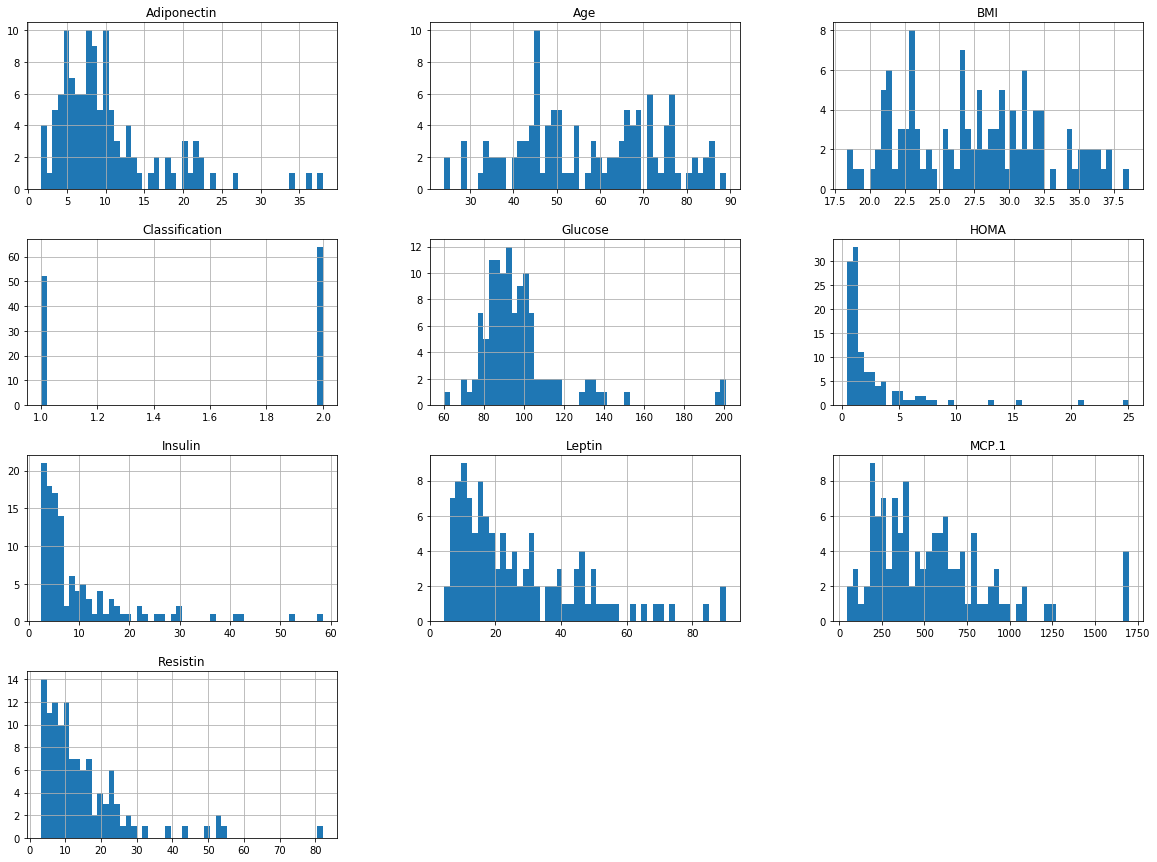

In [5]:
cancer.hist(bins=50, figsize=(20,15))
plt.show()

For preprocessing, we do feature scaling on the attribute by standardization. After that the dataset is split into a train set and test set.

In [6]:
# Preprocessing and split data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seperate features and target variable
X = cancer.drop("Classification", axis=1)
y = np.array(cancer["Classification"].copy())

# Feature scaling
X = StandardScaler().fit_transform(X)

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Four classifiers are compared: SGD, SVM, Decision Tree and Random Forest. With grid search different combinations of parameters can be applied and the best setting is saved to the final model.

In [7]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]}
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)
    
forest_model = grid_search.best_estimator_

Best parameters:  {'max_features': 6, 'n_estimators': 10}
0.6413043478260869 {'max_features': 2, 'n_estimators': 3}
0.5978260869565217 {'max_features': 2, 'n_estimators': 10}
0.6413043478260869 {'max_features': 2, 'n_estimators': 30}
0.6195652173913043 {'max_features': 2, 'n_estimators': 50}
0.6304347826086957 {'max_features': 2, 'n_estimators': 100}
0.6086956521739131 {'max_features': 4, 'n_estimators': 3}
0.6304347826086957 {'max_features': 4, 'n_estimators': 10}
0.6413043478260869 {'max_features': 4, 'n_estimators': 30}
0.6086956521739131 {'max_features': 4, 'n_estimators': 50}
0.5978260869565217 {'max_features': 4, 'n_estimators': 100}
0.5760869565217391 {'max_features': 6, 'n_estimators': 3}
0.6956521739130435 {'max_features': 6, 'n_estimators': 10}
0.6086956521739131 {'max_features': 6, 'n_estimators': 30}
0.6413043478260869 {'max_features': 6, 'n_estimators': 50}
0.6304347826086957 {'max_features': 6, 'n_estimators': 100}
0.6086956521739131 {'max_features': 8, 'n_estimators': 3}

In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 1}
0.6847826086956522 {'max_depth': 1}
0.6086956521739131 {'max_depth': 5}
0.6086956521739131 {'max_depth': 10}
0.6304347826086957 {'max_depth': 50}
0.6086956521739131 {'max_depth': 100}


In [9]:
# Support Vector Machine
from sklearn.svm import SVC

param_grid = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1.0]},
]

svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

svc_model = grid_search.best_estimator_

Best parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.5652173913043478 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5652173913043478 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.5652173913043478 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.5652173913043478 {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
0.5652173913043478 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5652173913043478 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.6956521739130435 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6521739130434783 {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
0.5652173913043478 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.6956521739130435 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.6739130434782609 {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
0.7282608695652174 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.6956521739130435 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.5869565217391305 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.6739130434782609 {'C': 100, 'gamma

In [10]:
from sklearn.linear_model import SGDClassifier

param_grid = [
    {'loss': ['log'],
     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
     'max_iter': [1, 10, 100, 1000],}
]

sgd_clf = SGDClassifier()
grid_search = GridSearchCV(sgd_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

sgd_model = grid_search.best_estimator_

Best parameters:  {'alpha': 0.001, 'loss': 'log', 'max_iter': 100}
0.6956521739130435 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1}
0.5543478260869565 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 10}
0.5652173913043478 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 100}
0.6847826086956522 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000}
0.6086956521739131 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1}
0.6086956521739131 {'alpha': 0.001, 'loss': 'log', 'max_iter': 10}
0.7391304347826086 {'alpha': 0.001, 'loss': 'log', 'max_iter': 100}
0.7282608695652174 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000}
0.6739130434782609 {'alpha': 0.01, 'loss': 'log', 'max_iter': 1}
0.6630434782608695 {'alpha': 0.01, 'loss': 'log', 'max_iter': 10}
0.717391304347826 {'alpha': 0.01, 'loss': 'log', 'max_iter': 100}
0.7282608695652174 {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000}
0.6739130434782609 {'alpha': 0.1, 'loss': 'log', 'max_iter': 1}
0.6739130434782609 {'alpha': 0.1, 'loss': 'log', 'max_iter':

After estimating the parameters, we can train the final models and evaluate them on the test set. Here we used, the accuracy, precision, recall and F1 score as evaluation metrics. Additionally, confusion matrices are also plotted.

SGD
Accuracy: 0.71
Precision: 0.73
Recall: 0.67
F1: 0.70


Confusion matrix
[[8 4]
 [3 9]]


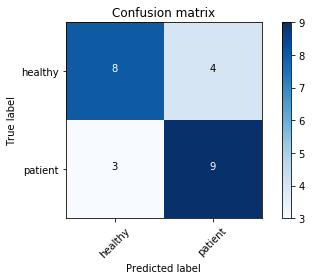

SVM
Accuracy: 0.88
Precision: 0.80
Recall: 1.00
F1: 0.89


Confusion matrix
[[12  0]
 [ 3  9]]


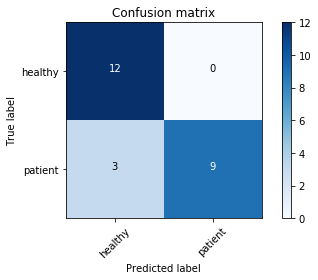

Decision Tree
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1: 0.75


Confusion matrix
[[9 3]
 [3 9]]


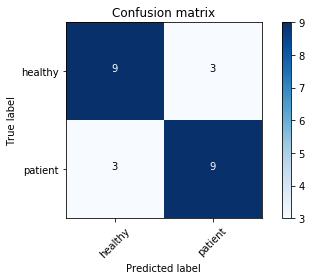

Random Forest
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1: 0.83


Confusion matrix
[[10  2]
 [ 2 10]]


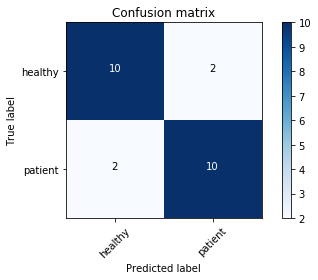

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import itertools
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    print('Confusion matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
class_names = ["healthy", "patient"]

models = {'SGD': sgd_model, 'SVM': svc_model, 'Decision Tree': tree_model,'Random Forest': forest_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation scores
    print(name)
    print("Accuracy: %.2f" % accuracy_score(y_test, predictions))
    print('Precision: %.2f' % precision_score(y_test, predictions))
    print("Recall: %.2f" % recall_score(y_test, predictions))
    print('F1: %.2f' % f1_score(y_test, predictions))
    print("\n")
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predictions)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
    plt.show()

In this section, we visualize the classification and decision regions. Since the data has more than two dimensions (features), we can only train the models on two features. So this is just for visualization purposed and doesn't reflect the real dataset.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = cancer.drop("Classification", axis=1)
Y = np.array(cancer["Classification"].copy())
X = StandardScaler().fit_transform(X)
model = LogisticRegression()

# create the RFE model and select 2 best attributes
rfe = RFE(model, 2)
rfe = rfe.fit(X, Y)

# summarize the selection of the attributes
print(rfe.support_)
X = rfe.transform(X)

[False False  True False False False False  True False]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# Random Forest
param_grid = [
    {'n_estimators': [2, 6, 10, 30, 50, 100], 'max_features': [2]}
]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
forest_model = grid_search.best_estimator_

# Decision Tree
param_grid = [
    {'max_depth': [1, 5, 10, 100]}
]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
tree_model = grid_search.best_estimator_

# Support Vectore Machine with RBF kernel
param_grid = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1.0]},
]
svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
svc_model = grid_search.best_estimator_

# Stochastic Gradient Descent
param_grid = [
    {'loss': ['log'],
     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
     'max_iter': [1, 10, 100, 1000],}
]
sgd_clf = SGDClassifier()
grid_search = GridSearchCV(sgd_clf, param_grid, cv=9)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
sgd_model = grid_search.best_estimator_

Best parameters:  {'max_features': 2, 'n_estimators': 30}
Best parameters:  {'max_depth': 1}
Best parameters:  {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
Best parameters:  {'alpha': 0.01, 'loss': 'log', 'max_iter': 10}


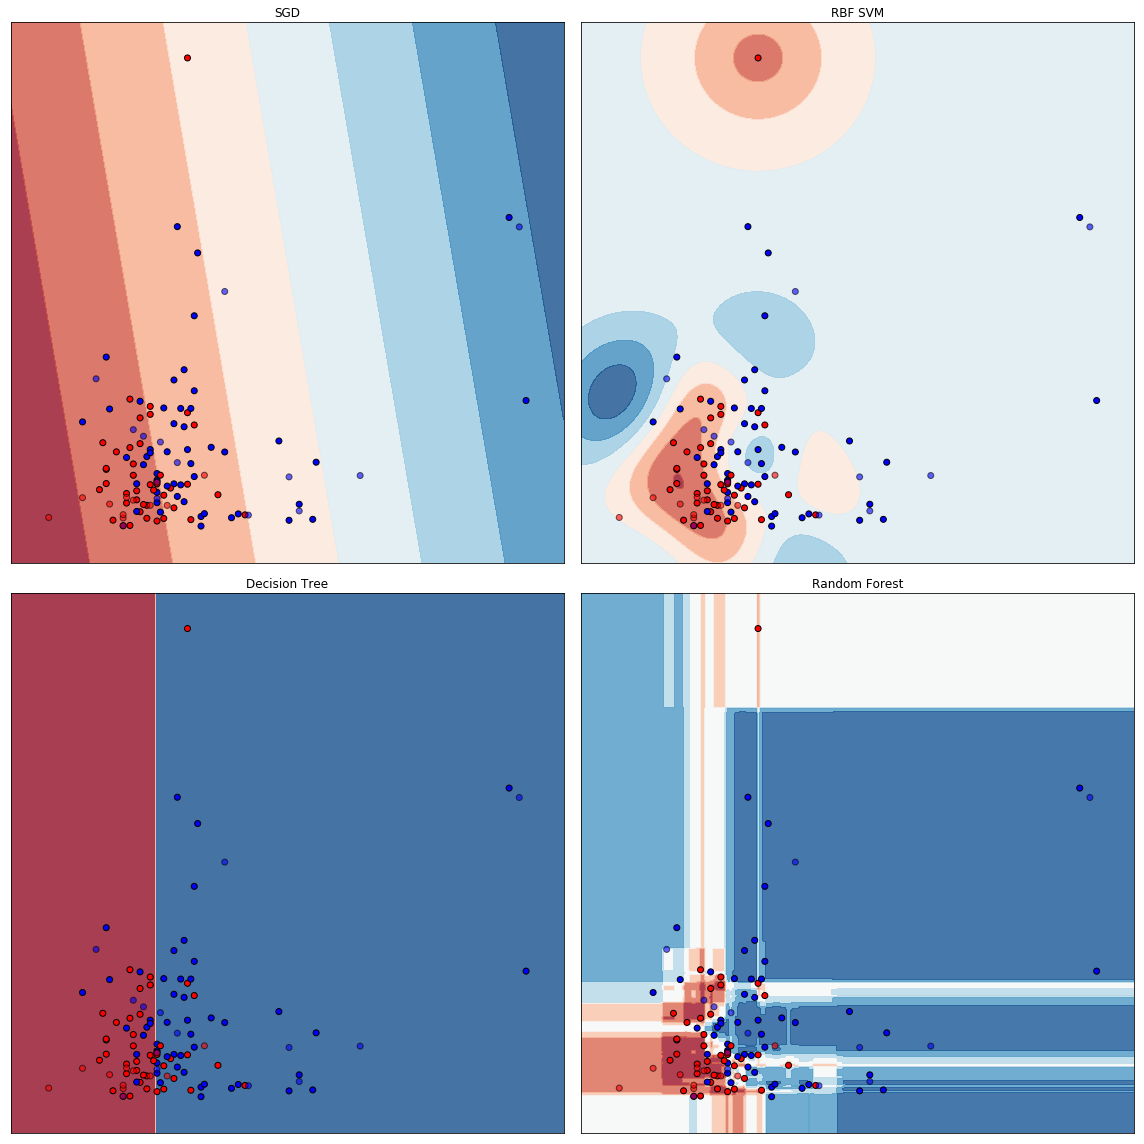

In [15]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

names = ["SGD", "RBF SVM", "Decision Tree", "Random Forest"]

classifiers = [
    sgd_model,
    svc_model,
    tree_model,
    forest_model
]

figure = plt.figure(figsize=(16, 16))
i = 1

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
    #        size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()